In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Task A: Picking up the shovel (10 points)

**Note: You will use the data you preprocess in this task in all the subsequent ones.**

Our friends' argument concerns the entire show. We have given you a file in the `data/` folder that contains the script of every single episode. New episodes are indicated by '>>', new scenes by '>', and the rest of the lines are dialogue lines. Some lines are said by multiple people (for example, lines indicated by 'All' or 'Together'); **you must discard these lines**, for the sake of simplicity. However, you do not need to do it for Q1 in this task -- you'll take care of it when you solve Q2.

**Q1**. (5 points) Your first task is to extract all lines of dialogue in each scene and episode, creating a dataframe where each row has the episode and scene where a dialogue line was said, the character who said it, and the line itself. You do not need to extract the proper name of the episode (e.g. episode 1 can appear as "Series 01 Episode 01 - Pilot Episode", and doesn't need to appear as "Pilot Episode"). Then, answer the following question: In total, how many scenes are there in each season? We're not asking about unique scenes; the same location appearing in two episodes counts as two scenes. You can use a Pandas dataframe with a season column and a scene count column as the response.

**Note: The data refers to seasons as "series".**

In [2]:
import codecs

# 1. read file
with codecs.open("data/all_scripts.txt", encoding="utf8") as f:
    script_lines = f.read().splitlines()
print(script_lines[:10])

['>> Series 01 Episode 01 – Pilot\xa0Episode', '> A corridor at a sperm bank.', 'Sheldon: So if a photon is directed through a plane with two slits in it and either slit is observed it will not go through both slits. If it’s unobserved it will, however, if it’s observed after it’s left the plane but before it hits its target, it will not have gone through both slits.', 'Leonard: Agreed, what’s your point?', 'Sheldon: There’s no point, I just think it’s a good idea for a tee-shirt.', 'Leonard: Excuse me?', 'Receptionist: Hang on.', 'Leonard: One across is Aegean, eight down is Nabakov, twenty-six across is MCM, fourteen down is… move your finger… phylum, which makes fourteen across Port-au-Prince. See, Papa Doc’s capital idea, that’s Port-au-Prince. Haiti.', 'Receptionist: Can I help you?', 'Leonard: Yes. Um, is this the High IQ sperm bank?']


In [3]:
# 2. iterate and organise
episodes = []
scenes = []
scenes_counter = []
characters = []
dialogues = []

episode = None
scene = None
scene_counter = 0
for line in script_lines:
    if line.startswith(">>"):
        episode = line[2:].strip()
        scene = None
    elif line.startswith(">"):
        assert episode is not None
        scene = line[1:].strip()
        scene_counter += 1
    else:
        assert episode is not None and scene is not None

        character, dialogue = line.split(":", 1)
        character = character.strip()
        dialogue = dialogue.strip()

        if character.lower() in ["all", "together", "everybody", "everyone"]:
            continue

        episodes.append(episode)
        scenes.append(scene)
        scenes_counter.append(scene_counter)
        characters.append(character)
        dialogues.append(dialogue)

scripts = pd.DataFrame({
    "episode": episodes,
    "scene": scenes,
    "scene_id": scenes_counter,
    "character": characters,
    "text": dialogues
})
scripts.head(100)

,episode,scene,scene_id,character,text
0,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,1,Sheldon,So if a photon is directed through a plane wit...
1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,1,Leonard,"Agreed, what’s your point?"
2,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,1,Sheldon,"There’s no point, I just think it’s a good ide..."
3,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,1,Leonard,Excuse me?
4,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,1,Receptionist,Hang on.
...,...,...,...,...,...
95,Series 01 Episode 01 – Pilot Episode,Sheldon and Leonard’s apartment.,3,Penny,"Okay, thankyou."
96,Series 01 Episode 01 – Pilot Episode,Sheldon and Leonard’s apartment.,3,Leonard,You’re very welcome.
97,Series 01 Episode 01 – Pilot Episode,Sheldon and Leonard’s apartment.,3,Penny,"This looks like some serious stuff, Leonard, d..."
98,Series 01 Episode 01 – Pilot Episode,Sheldon and Leonard’s apartment.,3,Sheldon,Actually that’s my work.


In [4]:
# 3. explore characters to make sure there are no casefolding problems
scripts.character.value_counts()

# looks good.

Sheldon          11689
Leonard           9829
Penny             7677
Howard            5872
Raj               4779
                 ...  
Dr Tyson             3
Girls                3
Second child         3
Theatre Staff        3
Helium Man           3
Name: character, Length: 195, dtype: int64

In [5]:
# 4. explore episodes
scripts.episode.value_counts()

# Looks good.

Series 01 Episode 01 – Pilot Episode                                320
Series 01 Episode 07 – The Dumpling Paradox                         283
Series 04 Episode 03 – The Zazzy Substitution                       271
Series 10 Episode 01 – The Conjugal Conjecture                      269
Series 09 Episode 22 – The Fermentation Bifurcation                 263
                                                                   ... 
Series 05 Episode 14 – The Beta Test Initiation                     169
Series 03 Episode 13 – The Bozeman Reaction                         165
Series 03 Episode 18 – The Pants Alternative                        160
Series 06 Episode 17 – The Monster Isolation                        160
Series 06 Episode 18 – The Contractual Obligation Implementation    141
Name: episode, Length: 231, dtype: int64

In [6]:
# 5. get the season, preprocess episode
scripts["season"] = scripts.episode.apply(lambda s: s.split("Episode")[0].strip().split("Series")[1].strip()).astype(
    int)
scripts.sample(10)

,episode,scene,scene_id,character,text,season
11172,Series 03 Episode 09 – The Vengeance Formulation,The university cafeteria.,483,Sheldon,"Oh, good, my turn. Well, this is very exciting...",3
48717,Series 10 Episode 14 – The Emotion Detection A...,The stairwell.,2640,Bernadette,Wouldn’t that be nice.,10
43967,Series 09 Episode 17 – The Celebration Experim...,Later.,2356,Stephen,Happy birthday to you.,9
16857,Series 04 Episode 11 – The Justice League Reco...,The comic book store.,744,Sheldon,Why not? Penny did it.,4
42304,Series 09 Episode 10 – The Earworm Reverberation,Amy’s apartment.,2247,Amy,It is?,9
29427,Series 06 Episode 23 – The Love Spell Potential,The apartment.,1450,Penny,"Ooh, I have an idea. Since it’s not happening ...",6
7938,Series 02 Episode 17 – The Terminator Decoupling,Penny’s apartment. Penny is on the phone.,330,Leonard,Look at it. Non-alcoholic beer.,2
17317,Series 04 Episode 13 – The Love Car Displacement,The hotel.,772,Glenn,"Well, I got to run. The panel’s tomorrow morni...",4
45728,Series 10 Episode 01 – The Conjugal Conjecture,Howard and Bernadette’s kitchen.,2463,Raj,That’s not him.,10
2103,Series 01 Episode 09 – The Cooper-Hofstadter P...,Leonard’s bedroom. Penny is looking through hi...,78,Penny,Uh-huh.,1


In [7]:
# # 6. scenes per season NOT PER EPISODE!
# seasons = list(sorted(scripts.season.value_counts().index))
# scenes_per_season = pd.DataFrame({
#     "season": seasons,
#     "scenes": np.zeros(len(seasons))
# })
# scenes_per_season = scenes_per_season.set_index("season")
#
# scene = None
# season = None
# for _, row in scripts.iterrows():
#     if season != row.season:
#         season = row.season
#         scene = row.scene
#         scenes_per_season.at[season, "scenes"] += 1
#     elif row.scene != scene:
#         scene = row.scene
#         scenes_per_season.at[season, "scenes"] += 1
#
# scenes_per_season

scripts.groupby(["season"]).scene_id.nunique()

season
1     159
2     231
3     236
4     279
5     254
6     304
7     332
8     327
9     337
10    346
Name: scene_id, dtype: int64

**Q2**. (5 points) Now, let's define two sets of characters: all the characters, and recurrent characters. Recurrent characters are those who appear in more than one episode. For the subsequent sections, you will need to have a list of recurrent characters. Assume that there are no two _named characters_ (i.e. characters who have actual names and aren't referred to generically as "little girl", "grumpy grandpa", etc.) with the same name, i.e. there are no two Sheldons, etc. Generate a list of recurrent characters who have more than 90 dialogue lines in total, and then take a look at the list you have. If you've done this correctly, you should have a list of 20 names. However, one of these is clearly not a recurrent character. Manually remove that one, and print out your list of recurrent characters. To remove that character, pay attention to the _named character_ assumption we gave you earlier on. **For all the subsequent questions, you must only keep the dialogue lines said by the recurrent characters in your list.**

_Hint: "I know all the recurrent characters because I've watched the entire series five times" is not an acceptable argument, so you need to actually generate the list._

In [8]:
# 1. counts
char_counts = scripts.character.value_counts()
recurrent_characters_with_counts = char_counts[char_counts > 90]
recurrent_characters_with_counts

Sheldon         11689
Leonard          9829
Penny            7677
Howard           5872
Raj              4779
Amy              3472
Bernadette       2690
Stuart            733
Priya             222
Mrs Cooper        213
Emily             164
Beverley          162
Mrs Wolowitz      136
Zack              135
Arthur            130
Wil               126
Leslie            116
Kripke            106
Man               105
Bert               95
Name: character, dtype: int64

In [9]:
# 2. recurrent minus "Man"
recurrent_characters = list(recurrent_characters_with_counts.index)
assert len(recurrent_characters) == 20
recurrent_characters.remove("Man")
assert len(recurrent_characters) == 19
recurrent_characters

['Sheldon',
 'Leonard',
 'Penny',
 'Howard',
 'Raj',
 'Amy',
 'Bernadette',
 'Stuart',
 'Priya',
 'Mrs Cooper',
 'Emily',
 'Beverley',
 'Mrs Wolowitz',
 'Zack',
 'Arthur',
 'Wil',
 'Leslie',
 'Kripke',
 'Bert']

In [10]:
# 3. filter dialogues
scripts = scripts[scripts.character.isin(recurrent_characters)]
assert len(scripts.character.value_counts()) == 19
scripts.head(20)

,episode,scene,scene_id,character,text,season
0,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,1,Sheldon,So if a photon is directed through a plane wit...,1
1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,1,Leonard,"Agreed, what’s your point?",1
2,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,1,Sheldon,"There’s no point, I just think it’s a good ide...",1
3,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,1,Leonard,Excuse me?,1
5,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,1,Leonard,"One across is Aegean, eight down is Nabakov, t...",1
7,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,1,Leonard,"Yes. Um, is this the High IQ sperm bank?",1
9,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,1,Sheldon,I think this is the place.,1
11,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,1,Leonard,Thank-you. We’ll be right back.,1
13,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,1,Sheldon,"Leonard, I don’t think I can do this.",1
14,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,1,Leonard,"What, are you kidding? You’re a semi-pro.",1


## Task B: Read the ~~stats~~ scripts carefully (30 points)

### Part 1: Don't put the shovel down just yet

**Q3**. (2.5 points) From each dialogue line, replace punctuation marks (listed in the EXCLUDE_CHARS variable provided in `helpers/helper_functions.py`) with whitespaces, and lowercase all the text. **Do not remove any stopwords, leave them be for all the questions in this task.**

In [11]:
# 1. prepare excludor
from helpers.helper_functions import EXCLUDE_CHARS


def exclude_chars(text, exclude_chars_list):
    for c in exclude_chars_list:
        text = text.replace(c, " ")
    return text


print(dialogue)
print(exclude_chars(dialogue, EXCLUDE_CHARS))

(Knock, knock, knock) Amy. (Knock, knock, knock) Amy. (Knock, knock, knock) Amy. Will you marry me?
 Knock  knock  knock  Amy   Knock  knock  knock  Amy   Knock  knock  knock  Amy  Will you marry me 


In [12]:
# 2. apply
scripts.text = scripts.text.apply(lambda t: exclude_chars(t, EXCLUDE_CHARS)).apply(str.lower)
scripts.head(10)

,episode,scene,scene_id,character,text,season
0,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,1,Sheldon,so if a photon is directed through a plane wit...,1
1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,1,Leonard,agreed what s your point,1
2,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,1,Sheldon,there s no point i just think it s a good ide...,1
3,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,1,Leonard,excuse me,1
5,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,1,Leonard,one across is aegean eight down is nabakov t...,1
7,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,1,Leonard,yes um is this the high iq sperm bank,1
9,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,1,Sheldon,i think this is the place,1
11,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,1,Leonard,thank you we ll be right back,1
13,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,1,Sheldon,leonard i don t think i can do this,1
14,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,1,Leonard,what are you kidding you re a semi pro,1


**Q4**. (5 points) For each term, calculate its "corpus frequency", i.e. its number of occurrences in the entire series. Visualize the distribution of corpus frequency using a histogram. Explain your observations. What are the appropriate x and y scales for this plot?

In [13]:
# 1. count words occurances in corups aka in all dialoges in all scenes
from collections import Counter

word_freq = Counter([word for text in scripts.text.array for word in text.split()])
common_words = word_freq.most_common()
counts = np.array(list(word_freq.values()))
assert len(word_freq.values()) == len(common_words) == len(counts)

print(f"Words: {len(word_freq)}")
print(f"Top 30 most common:\n{common_words[:30]}")

Words: 21102
Top 30 most common:
[('i', 24764), ('you', 22977), ('the', 15110), ('to', 14295), ('a', 13518), ('s', 12105), ('it', 11182), ('and', 8784), ('that', 8526), ('t', 7617), ('of', 7335), ('in', 5676), ('is', 5444), ('we', 5293), ('what', 5206), ('me', 4905), ('my', 4810), ('m', 4797), ('on', 4297), ('re', 4105), ('oh', 4098), ('this', 4080), ('with', 3945), ('have', 3907), ('no', 3814), ('not', 3762), ('for', 3748), ('your', 3604), ('know', 3505), ('do', 3456)]


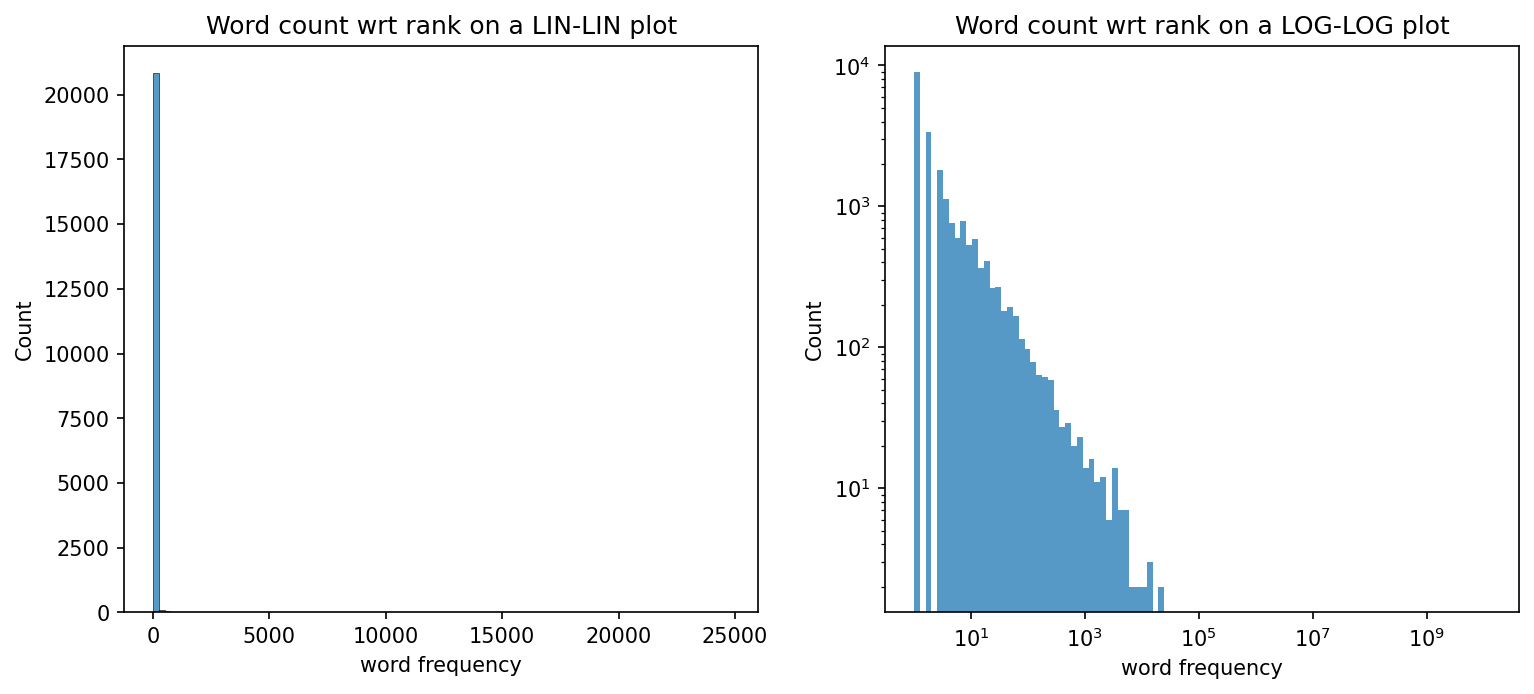

In [14]:
# 2. its a power law of course
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), dpi=150)

for ax in (ax1, ax2):
    ax.set_xlabel("word rank")
    ax.set_xlabel("word frequency")

ax1.set_title("Word count wrt rank on a LIN-LIN plot")
sns.histplot(x=counts, bins=100, ax=ax1)
# sns.scatterplot(x=range(1, len(common_words)+1), y=[wc[1] for wc in common_words], ax=ax1)

ax2.set_title("Word count wrt rank on a LOG-LOG plot")
sns.histplot(x=counts, bins=np.logspace(np.log(counts.min()), np.log(counts.max()), 100), ax=ax2)
ax2.set_xscale("log")
ax2.set_yscale("log")


In [15]:
"Yes, this is a power law"

'Yes, this is a power law'

### Part 2: Talkativity
**Q5**. (2.5 points) For each of the recurrent characters, calculate their total number of words uttered across all episodes. Based on this, who seems to be the most talkative character?

In [16]:
utterances = []
for character in recurrent_characters:
    u = scripts[scripts.character == character].text.apply(lambda t: len(t.split())).sum()
    utterances.append((u, character))
for i, (u, c) in enumerate(reversed(sorted(utterances))):
    print(f"{c} uttered\t{u} words {'***WINNER***' if i == 0 else ''}")

Sheldon uttered	185388 words ***WINNER***
Leonard uttered	102496 words 
Penny uttered	79270 words 
Howard uttered	69505 words 
Raj uttered	60099 words 
Amy uttered	39933 words 
Bernadette uttered	27726 words 
Stuart uttered	7955 words 
Mrs Cooper uttered	3389 words 
Beverley uttered	2029 words 
Priya uttered	1940 words 
Wil uttered	1678 words 
Emily uttered	1571 words 
Mrs Wolowitz uttered	1459 words 
Arthur uttered	1451 words 
Zack uttered	1427 words 
Leslie uttered	1249 words 
Kripke uttered	1246 words 
Bert uttered	1146 words 


**Q6**. (12.5 points) For each of the recurrent characters, calculate their total number of words uttered per episode (ignoring episodes that the character does not appear in), and calculate a **robust summary statistic** for the word count distribution of each person.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**i)** (2.5 points) What changes do you observe, compared to the analysis in Q5?

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ii)** (2.5 points) Why is this analysis an improvement over the previous one, and how could you improve it even further? _Hint: The improvement involves making your unit for word counts even more granular - you can go further down than episodes._

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iii)** (7.5 points) Incorporate that improvement. Do you still see the same results? How **confident** can you be that the "most talkative" person given by this twice improved method is really more talkative than the second most talkative one? _Hint: Read the question again. A good idea would be to use bootstrapping and calculate your summary statistic on each bootstrapped set._

In [17]:
# 1. prepare boostrap for CIs

from scipy.stats import bootstrap
ci95 = lambda x, f: bootstrap(x.to_numpy()[None, :], f, confidence_level=0.95, method="percentile", n_resamples=10000, random_state=72)

ci95_lower = lambda f, suffix="": ["ci95_lower" + suffix, lambda x: ci95(x, f).confidence_interval.low]
ci95_upper = lambda f, suffix="": ["ci95_upper" + suffix, lambda x: ci95(x, f).confidence_interval.high]

# sausage line
scripts.groupby(["character", "episode"]).text.apply(lambda texts: texts.apply(lambda t: len(t.split())).sum()).groupby("character").agg(["count", "median", ci95_lower(np.median, "_median"), ci95_upper(np.median, "_median"), "mean", "std",  ci95_lower(np.mean, "_mean"), ci95_upper(np.mean, "_mean")]).sort_values("median", ascending=False).head(5)


,count,median,ci95_lower_median,ci95_upper_median,mean,std,ci95_lower_mean,ci95_upper_mean
character,,,,,,,,
Sheldon,231,775.0,736.0,805.0,802.545455,252.438053,770.726515,834.706061
Leonard,231,397.0,365.0,437.0,443.705628,212.006501,416.302056,471.169372
Arthur,4,325.0,269.0,532.0,362.750000,117.025282,287.000000,475.250000
Penny,229,323.0,306.0,346.0,346.157205,154.356962,326.458515,366.524127
Mrs Cooper,8,293.5,78.0,733.0,423.625000,408.326878,191.750000,711.625000


In [18]:
# 2. on a scene-to-scene basis
scripts.groupby(["character", "scene_id"]).text.apply(lambda texts: texts.apply(lambda t: len(t.split())).sum()).groupby("character").agg(["count", "median", ci95_lower(np.median, "_median"), ci95_upper(np.median, "_median"), "mean", "std",  ci95_lower(np.mean, "_mean"), ci95_upper(np.mean, "_mean")]).sort_values("median", ascending=False).head(5)

,count,median,ci95_lower_median,ci95_upper_median,mean,std,ci95_lower_mean,ci95_upper_mean
character,,,,,,,,
Mrs Cooper,29,103.0,78.0000,145.0,116.862069,82.397436,89.758621,148.966379
Sheldon,1693,96.0,93.0000,101.0,109.502658,80.041011,105.714014,113.303677
Arthur,16,88.0,51.4875,120.0,90.687500,55.043884,65.625000,117.812500
Beverley,23,70.0,49.0000,132.0,88.217391,64.594509,62.954348,114.783696
Leslie,18,60.0,29.0000,86.5,69.388889,60.205666,44.444444,97.833333


**Comment:**

i. now the top 5 is changed, the one who are more talkative but do not appear in all episodes come up to the top so it is more realistic if we are asked about who is more talkative. but still sheldon is first because he dominates the episodes
ii. more granularity tells us more about how much a person is talkative. maybe someone is more talkative but appears in only one episode like Arthur (who appeared in 4), or even more granular - on a scene basis.
iii. We are not confident that mrs cooper is really more talkative than sheldon becuase her CI is much wider than Sheldon's for the median. I use the median as it is more robust and also use the robust bootstrap method with the percentile method (assuming its assumptions are met which I do not check for simplicity) to compute the CI.

---


### Part 3: Obligatory Spark cameo
**Q7**. (7.5 points) Write a Spark script that does the following: Given the raw input file and your list of recurrent characters, create an RDD containing (speaker, dialogue line) rows **only for the recurrent characters** (assume that you already have the list --  no need to calculate it using Spark), and then generate a vectorized bag of words representation for each dialogue line, thus generating an RDD with (speaker, bag of words vector) rows. Then, calculate an aggregated bag of words vector (sum of all vectors) for each person. The final output is therefore an RDD with each of its rows being (speaker, aggregated bag of words vector). For your bag of words vectors, you can use $1\times|V|$ scipy CSR matrices (where $|V|$ is the size of the vocabulary). No filtering of the vocabulary is necessary for this part.

You do not need to run this script, but you do need to use Spark logic and also, the syntax needs to be correct.

In [120]:
import pyspark
import pyspark.sql
from pyspark.sql import *
from pyspark.sql.functions import *
import numpy as np
import pandas as pd

conf = pyspark.SparkConf().setMaster("local[*]").setAll([
    ('spark.executor.memory', '12g'),  # find
    ('spark.driver.memory','6g'), # your
    ('spark.driver.maxResultSize', '4G') # setup
])
# create the session
spark = SparkSession.builder.config(conf=conf).getOrCreate()

# create the context
sc = spark.sparkContext

# FIX for Spark 2.x
locale = sc._jvm.java.util.Locale
locale.setDefault(locale.forLanguageTag("en-US"))

spark

/home/user72/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [121]:
df_spark = spark.read.text("data/all_scripts.txt")

df_spark = df_spark.filter(~df_spark.value.startswith(">"))
df_spark = df_spark.select(
    split(col("value"), ":", 2).getItem(0).alias("character"),
    trim(split(col("value"), ":", 2).getItem(1)).alias("sentence")
)
df_spark = df_spark.filter(df_spark.character.isin(recurrent_characters))

print(df_spark.printSchema())
df_spark.show()

/home/user72/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


root
 |-- character: string (nullable = true)
 |-- sentence: string (nullable = true)

None
+---------+--------------------+
|character|            sentence|
+---------+--------------------+
|  Sheldon|So if a photon is...|
|  Leonard|Agreed, what’s yo...|
|  Sheldon|There’s no point,...|
|  Leonard|          Excuse me?|
|  Leonard|One across is Aeg...|
|  Leonard|Yes. Um, is this ...|
|  Sheldon|I think this is t...|
|  Leonard|Thank-you. We’ll ...|
|  Sheldon|Leonard, I don’t ...|
|  Leonard|What, are you kid...|
|  Sheldon|No. We are commit...|
|  Leonard|Sheldon, this was...|
|  Sheldon|I know, and I do ...|
|  Leonard|I’m sure she’ll s...|
|  Sheldon|         I wouldn’t.|
|  Leonard|Well, what do you...|
|  Sheldon|    I want to leave.|
|  Leonard|               Okay.|
|  Sheldon|What’s the protoc...|
|  Leonard|I don’t know, I’v...|
+---------+--------------------+
only showing top 20 rows



In [122]:
from pyspark.ml.feature import Tokenizer, RegexTokenizer, StopWordsRemover
from pyspark.sql.functions import col, udf
from pyspark.sql.types import IntegerType

# tokenizer = Tokenizer(inputCol="sentence", outputCol="words")
# countTokens = udf(lambda words: len(words), IntegerType())
# tokenized = tokenizer.transform(df_spark)
# tokenized.select("sentence", "words").withColumn("tokens", countTokens(col("words"))).show(truncate=False)

regexTokenizer = RegexTokenizer(inputCol="sentence", outputCol="all_words", pattern="\\W")
df_spark = regexTokenizer.transform(df_spark)

remover = StopWordsRemover(inputCol="all_words", outputCol="words")
df_spark = remover.transform(df_spark).drop("all_words")
df_spark.show(10)

/home/user72/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


+---------+--------------------+--------------------+
|character|            sentence|               words|
+---------+--------------------+--------------------+
|  Sheldon|So if a photon is...|[photon, directed...|
|  Leonard|Agreed, what’s yo...|     [agreed, point]|
|  Sheldon|There’s no point,...|[point, think, go...|
|  Leonard|          Excuse me?|            [excuse]|
|  Leonard|One across is Aeg...|[one, across, aeg...|
|  Leonard|Yes. Um, is this ...|[yes, um, high, i...|
|  Sheldon|I think this is t...|      [think, place]|
|  Leonard|Thank-you. We’ll ...|[thank, ll, right...|
|  Sheldon|Leonard, I don’t ...|    [leonard, think]|
|  Leonard|What, are you kid...|[kidding, re, sem...|
+---------+--------------------+--------------------+
only showing top 10 rows



In [126]:
from pyspark.ml.feature import CountVectorizer
cv = CountVectorizer(inputCol="words", outputCol="features", vocabSize=10000, minDF=2.0)
cvModel = cv.fit(df_spark)

/home/user72/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [127]:
from pyspark.sql.functions import col
(df_spark
 .select("character", explode("words").alias("word"))
 .where(col("word").isin(cvModel.vocabulary))
 .groupBy("character", "word")
 .count()).show()

/home/user72/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


+----------+------------+-----+
| character|        word|count|
+----------+------------+-----+
|   Leonard|       eight|   16|
|   Sheldon|        trip|   23|
|   Sheldon|transvestite|    1|
|   Sheldon|conversation|   40|
|     Penny|        long|   48|
|   Leonard|        goes|   26|
|   Sheldon|        need|  271|
|     Penny|   wondering|   10|
|   Sheldon|       three|  131|
|   Sheldon|        moon|   14|
|   Leonard|        snap|    2|
|   Leonard|      geiger|    1|
|   Leonard|     largest|    2|
|     Penny|     nothing|   44|
|     Penny|        room|   29|
|   Sheldon|      liquor|    4|
|   Sheldon|     defence|   10|
|   Sheldon|     savings|    2|
|   Leonard|     weaving|    2|
|Mrs Cooper|         raj|    3|
+----------+------------+-----+
only showing top 20 rows



In [106]:

from pyspark.ml.feature import HashingTF, IDF, Tokenizer

hashingTF = HashingTF(inputCol="words", outputCol="rawFeatures", numFeatures=50000)
df_spark = hashingTF.transform(df_spark)

df_spark.select(col("words"), col("rawFeatures")).show(truncate=False)

/home/user72/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|words                                                                                                                                                                                             |rawFeatures                                                                                                                                                                                                                          |
+-------------------------------------------------------------------------------------------------------------------------------------------------

In [119]:
x = df_spark.head(2)
print(x[0].rawFeatures.__dict__)
print(x)
# df_spark.groupby("character").agg()
# subreddit_50k = filtered_tokens.rdd.map(lambda r: (r.subreddit, [r.word])).reduceByKey(lambda a,b: a+b).collect()
# Then, calculate an aggregated bag of words vector (sum of all vectors) for each person. The final output is therefore an RDD with each of its rows being (speaker, aggregated bag of words vector). For your bag of words vectors, you can use $1\times|V|$ scipy CSR matrices (where $|V|$ is the size of the vocabulary). No filtering of the vocabulary is necessary for this part.


{'size': 50000, 'indices': array([  518,  4728,  9126,  9927, 15536, 18264, 20039, 20911, 21898,
       26660, 33229, 38935, 41662, 46147, 46451], dtype=int32), 'values': array([1., 1., 1., 1., 1., 1., 2., 1., 3., 1., 2., 1., 1., 1., 1.])}
[Row(character='Sheldon', sentence='So if a photon is directed through a plane with two slits in it and either slit is observed it will not go through both slits. If it’s unobserved it will, however, if it’s observed after it’s left the plane but before it hits its target, it will not have gone through both slits.', words=['photon', 'directed', 'plane', 'two', 'slits', 'either', 'slit', 'observed', 'go', 'slits', 'unobserved', 'however', 'observed', 'left', 'plane', 'hits', 'target', 'gone', 'slits'], rawFeatures=SparseVector(50000, {518: 1.0, 4728: 1.0, 9126: 1.0, 9927: 1.0, 15536: 1.0, 18264: 1.0, 20039: 2.0, 20911: 1.0, 21898: 3.0, 26660: 1.0, 33229: 2.0, 38935: 1.0, 41662: 1.0, 46147: 1.0, 46451: 1.0})), Row(character='Leonard', sentence='Agreed,

/home/user72/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Task C: The Gossip Graph (30 points)

**Note: Only for this task, discard the recurrent characters whose names are not single words, e.g. Mrs. Cooper.**

Let us define _gossip_ as follows: if a dialogue line of character A mentions B by name in a scene that does not involve character B, we say that “A gossips about B” in that line. Multiple mentions of the same person in a single line are counted once, but a character can gossip about several others in the same line. For the sake of simplicity, we only consider gossips where the name of the recurrent character is mentioned as it appears in our list of characters; for example, if someone says "Cooper" and they mean Sheldon, we discard that.

**Q8**. (12.5 points) Create the two following graphs first:

1. (5 points) Create the _familiarity graph_, an undirected weighted graph, in which there is a node for each recurrent character, and an edge between two characters if they appear together in at least one scene. The weight of the edge between them is the number of scenes they appear in together. If an edge exists between two people in the familiarity graph, we say that they "know each other".
2. (7.5 points) Create the _gossip graph_, which is a directed weighted graph, in which there there is a node for each recurrent character, and a directed edge from the node for A to the node for B if A has gossiped about B at least once. The weight of the edge is the number of scenes in which A has gossiped about B.

_Hint: You can create each graph first as an adjacency matrix and then create a networkx graph out of that._

In [20]:
def plot_degree_distribution(G):
    degrees = {}
    for node in G.nodes():
        degree = G.degree(node)
        if degree not in degrees:
            degrees[degree] = 0
        degrees[degree] += 1
    sorted_degree = sorted(degrees.items())
    deg = [k for (k,v) in sorted_degree]
    cnt = [v for (k,v) in sorted_degree]
    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color='b')
    plt.title("Degree Distribution")
    plt.ylabel("Frequency")
    plt.xlabel("Degree")
    ax.set_xticks([d+0.05 for d in deg])
    ax.set_xticklabels(deg)

In [21]:
# Helper function for printing various graph properties
def describe_graph(G):
    print(nx.info(G))
    if nx.is_connected(G):
        print("Avg. Shortest Path Length: %.4f" %nx.average_shortest_path_length(G))
        print("Diameter: %.4f" %nx.diameter(G)) # Longest shortest path
    else:
        print("Graph is not connected")
        print("Diameter and Avg shortest path length are not defined!")
    print("Sparsity: %.4f" %nx.density(G))  # #edges/#edges-complete-graph
    # #closed-triplets(3*#triangles)/#all-triplets
    print("Global clustering coefficient aka Transitivity: %.4f" %nx.transitivity(G))

In [22]:
# Helper function for visualizing the graph
def visualize_graph(G, with_labels=True, k=None, alpha=1.0, node_shape='o'):
    #nx.draw_spring(G, with_labels=with_labels, alpha = alpha)
    pos = nx.spring_layout(G, k=k)
    if with_labels:
        lab = nx.draw_networkx_labels(G, pos, labels=dict([(n, n) for n in G.nodes()]), font_size=7)
    ec = nx.draw_networkx_edges(G, pos, alpha=alpha)
    nc = nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_color='g', node_shape=node_shape)
    plt.axis('off')

In [23]:
# i. discard some names
scripts_C = scripts[scripts.character.apply(lambda c: len(c.split()) == 1)]
recurrent_characters_C = list(scripts_C.character.value_counts().index)
recurrent_characters_C

['Sheldon',
 'Leonard',
 'Penny',
 'Howard',
 'Raj',
 'Amy',
 'Bernadette',
 'Stuart',
 'Priya',
 'Emily',
 'Beverley',
 'Zack',
 'Arthur',
 'Wil',
 'Leslie',
 'Kripke',
 'Bert']

In [24]:
import networkx as nx

familiarity_edges = {}
gossip_edges = {}

for scene_id, scene in scripts_C.groupby("scene_id"):
    characters = scene.character.value_counts().index.to_list()
    for c1 in characters:
        for c2 in characters:
            if c1 not in recurrent_characters_C or c2 not in recurrent_characters_C:
                pass
            if c1 > c2:
                familiarity_edges[(c1, c2)] = familiarity_edges.get((c1, c2), 0) + 1

    for scene_id, (character, text) in scene[["character", "text"]].iterrows():
        for c1 in characters:
            if c1 not in recurrent_characters_C:
                continue
            for c2 in recurrent_characters_C:
                if c1 == c2:
                    continue
                if c2.lower() in [w.lower() for w in text.split()]:
                    gossip_edges[(c1, c2)] = gossip_edges.get((c1, c2), 0) + 1


# 3h mark :--(

Graph with 17 nodes and 99 edges
Avg. Shortest Path Length: 1.2721
Diameter: 2.0000
Sparsity: 0.7279
Global clustering coefficient aka Transitivity: 0.7813


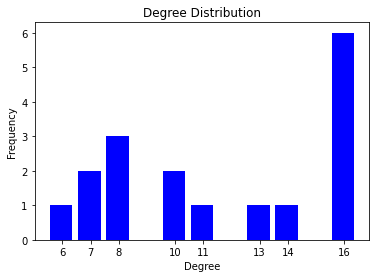

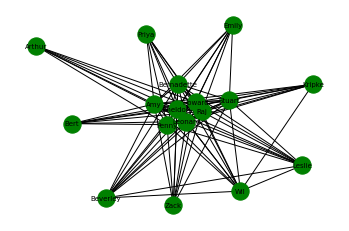

('Sheldon',
 {'Leonard': {'weight': 1102},
  'Penny': {'weight': 710},
  'Howard': {'weight': 640},
  'Raj': {'weight': 585},
  'Leslie': {'weight': 15},
  'Kripke': {'weight': 21},
  'Beverley': {'weight': 15},
  'Stuart': {'weight': 78},
  'Bernadette': {'weight': 148},
  'Wil': {'weight': 16},
  'Zack': {'weight': 15},
  'Amy': {'weight': 476},
  'Priya': {'weight': 24},
  'Arthur': {'weight': 15},
  'Emily': {'weight': 7},
  'Bert': {'weight': 19}})

In [25]:
familiarity_graph = nx.Graph()
familiarity_graph.add_nodes_from(recurrent_characters_C)
familiarity_graph.add_weighted_edges_from([(c1,c2,w) for (c1,c2), w in familiarity_edges.items()])
describe_graph(familiarity_graph)
plot_degree_distribution(familiarity_graph)
plt.show()
visualize_graph(familiarity_graph)
plt.show()
next(familiarity_graph.adjacency())

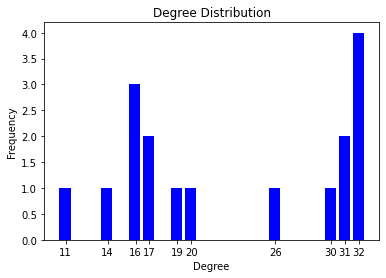

('Sheldon',
 {'Leonard': {'weight': 1225},
  'Penny': {'weight': 859},
  'Howard': {'weight': 473},
  'Raj': {'weight': 344},
  'Leslie': {'weight': 43},
  'Kripke': {'weight': 63},
  'Stuart': {'weight': 114},
  'Wil': {'weight': 78},
  'Bernadette': {'weight': 184},
  'Zack': {'weight': 38},
  'Amy': {'weight': 526},
  'Priya': {'weight': 57},
  'Emily': {'weight': 44},
  'Arthur': {'weight': 24},
  'Beverley': {'weight': 5},
  'Bert': {'weight': 41}})

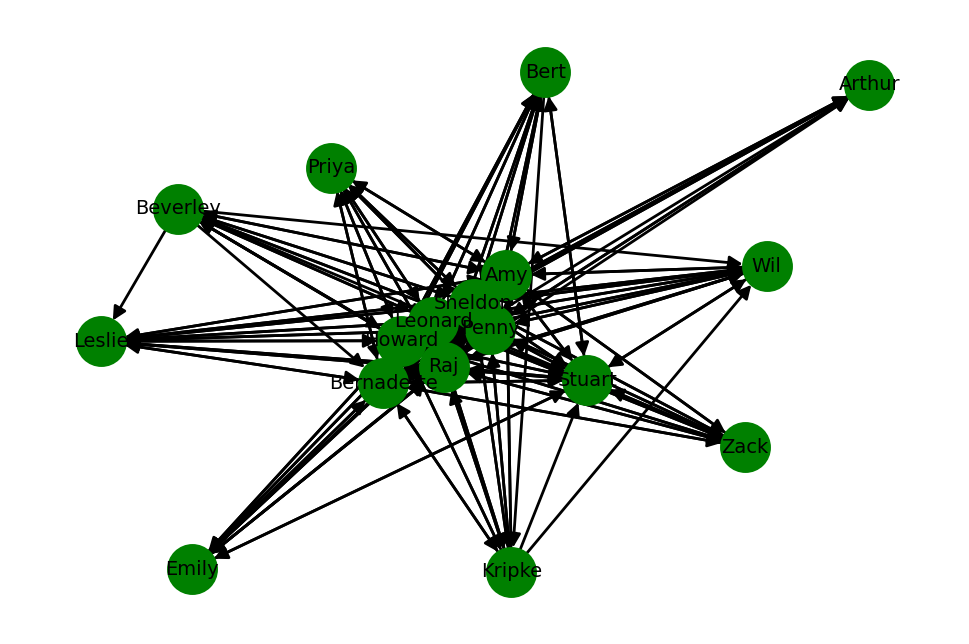

In [26]:
gossip_graph = nx.DiGraph()
gossip_graph.add_nodes_from(recurrent_characters_C)
gossip_graph.add_weighted_edges_from([(c1,c2,w) for (c1,c2), w in gossip_edges.items()])

plot_degree_distribution(gossip_graph)
plt.show()
plt.figure(dpi = 200)
visualize_graph(gossip_graph)
next(gossip_graph.adjacency())

Now, answer the following questions:

**Q9**. (5 points) Sheldon claims that every character in the show is familiar with everyone else through at most one intermediary. Based on the familiarity graph, is this true? If not, at most how many intermediaries are needed?

In [27]:
Counter([len(steps) for c, paths in nx.all_pairs_shortest_path(familiarity_graph) for c2, steps in paths.items()])

Counter({1: 17, 2: 198, 3: 74})

**Comment:**

Sheldon is right!

---

**Q10**. (5 points) Who is the character through whom the largest number of these indirect familiarities happen? Calculate an appropriate centrality metric on the familiarity graph to answer this question. You can use the package networkx for this section.

In [28]:
from operator import itemgetter

# Compute betweenness centrality
betweenness = nx.betweenness_centrality(familiarity_graph)

# Assign the computed centrality values as a node-attribute in your network
nx.set_node_attributes(familiarity_graph, betweenness, 'betweenness')
sorted_betweenness = sorted(betweenness.items(), key=itemgetter(1), reverse=True)

for c, bw in sorted_betweenness[:10]:
    print(c, ' has betweeness: %.3f' %bw)

Sheldon  has betweeness: 0.045
Leonard  has betweeness: 0.045
Penny  has betweeness: 0.045
Howard  has betweeness: 0.045
Raj  has betweeness: 0.045
Amy  has betweeness: 0.045
Stuart  has betweeness: 0.021
Bernadette  has betweeness: 0.014
Wil  has betweeness: 0.003
Priya  has betweeness: 0.000


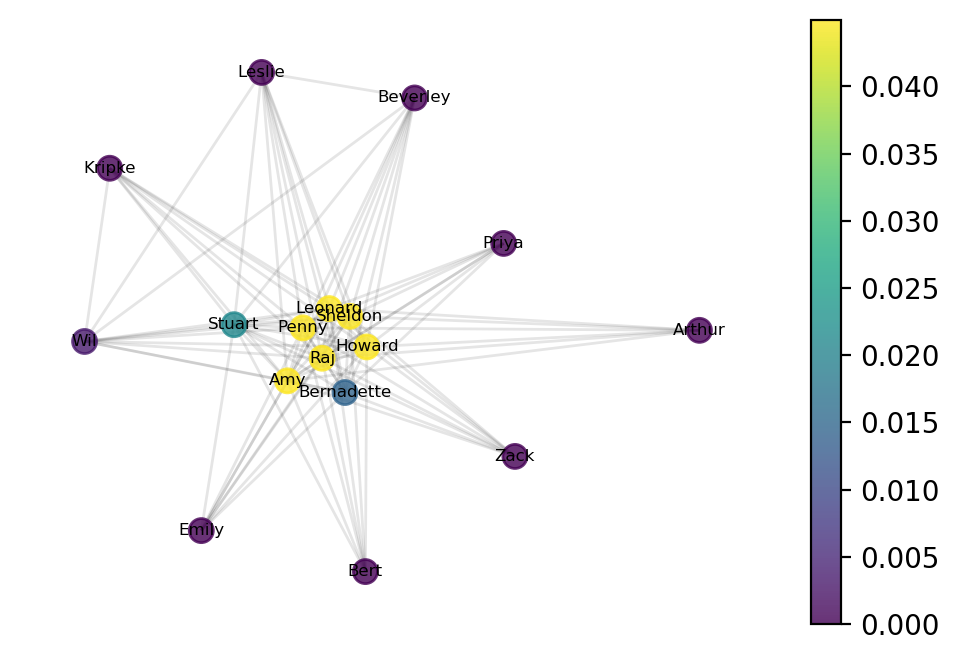

In [29]:
# similar pattern
plt.figure(dpi=200)
list_nodes =list(familiarity_graph.nodes())
list_nodes.reverse()   # for showing the nodes with high betweeness centrality
pos = nx.spring_layout(familiarity_graph)
ec = nx.draw_networkx_edges(familiarity_graph, pos, alpha=0.1)
nc = nx.draw_networkx_nodes(familiarity_graph, pos, nodelist=list_nodes, node_color=[familiarity_graph.nodes[n]["betweenness"] for n in list_nodes],
                            alpha=0.8, node_shape = '.')
lab = nx.draw_networkx_labels(familiarity_graph, pos, labels=dict([(n, n) for n in familiarity_graph.nodes()]),font_size=6)

plt.colorbar(nc)
plt.axis('off')
plt.show()

**Q11**. (2.5 points) Another claim of Sheldon's is that every recurrent character in the show gossips about all the other recurrent characters. What property of the gossip graph would correspond to this? Does the gossip graph possess that property? If not, then is it the case that for every pair of recurrent characters, at least one gossips about the other? What property would this correspond to?

In [30]:
nx.is_strongly_connected(gossip_graph)

True

<Figure size 1200x800 with 0 Axes>

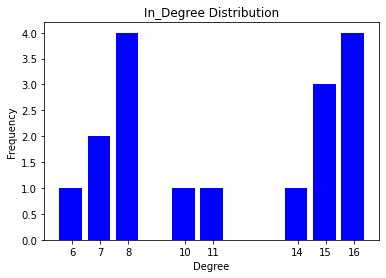

<Figure size 1200x800 with 0 Axes>

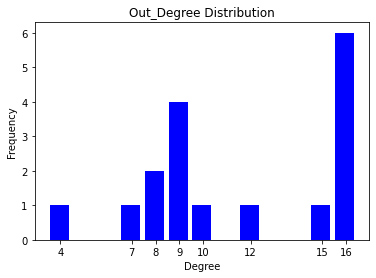

In [31]:
# well it is stongly connected, but it can still not have direct arrows between all pairs of nodes
# lets just see the degree distribution, it must be the same for everybody
def plot_degree_distribution(G, degree_type = "degree"):
    degrees = {}
    for node in G.nodes():
        if degree_type == "degree":
            degree = G.degree(node)
        elif degree_type == "in_degree":
            degree = G.in_degree(node)
        elif degree_type == "out_degree":
            degree = G.out_degree(node)
        else:
            raise RuntimeError(f"Invalid degree type {degree_type}")
        if degree not in degrees:
            degrees[degree] = 0
        degrees[degree] += 1
    sorted_degree = sorted(degrees.items())
    deg = [k for (k,v) in sorted_degree]
    cnt = [v for (k,v) in sorted_degree]
    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color='b')
    plt.title(f"{degree_type.title()} Distribution")
    plt.ylabel("Frequency")
    plt.xlabel("Degree")
    ax.set_xticks([d+0.05 for d in deg])
    ax.set_xticklabels(deg)

plt.figure(dpi=200)
plot_degree_distribution(gossip_graph, "in_degree")
plt.show()
plt.figure(dpi=200)
plot_degree_distribution(gossip_graph, "out_degree")
plt.show()


**Comment:**

The degree distors are not the same for everyone and not equal to the number of characters so this is not true. The graph should have been d-regular with d=len(regular_characters_C)!

---

**Q12**. (5 points) Use the gossip graph and the familiarity graph to figure out if for every pair of recurrent characters, one of them has gossiped about the other if and only if they know each other. Explain your method - the simpler, the better.

In [32]:
all_gossip = True
for c1, c2 in familiarity_graph.edges:
    # print(gossip_graph[c1])
    # print(gossip_graph[c2])
    if c2 not in gossip_graph[c1]:
        print(f"{c1} knows {c2} but has not gossiped about him/her")
        all_gossip = False
    if c1 not in gossip_graph[c2]:
        print(f"{c2} knows {c1} but has not gossiped about him/her")
        all_gossip = False
    # break

if not all_gossip:
    print("\nIt is not true that all have gossiped!")


Arthur knows Howard but has not gossiped about him/her
Arthur knows Raj but has not gossiped about him/her
Bernadette knows Beverley but has not gossiped about him/her
Stuart knows Kripke but has not gossiped about him/her
Stuart knows Beverley but has not gossiped about him/her
Leslie knows Beverley but has not gossiped about him/her
Wil knows Beverley but has not gossiped about him/her
Wil knows Kripke but has not gossiped about him/her

It is not true that all have gossiped!


## Task D: The Detective's Hat (30 points)

Sheldon claims that given a dialogue line, he can, with an accuracy of above 70%, say whether it's by himself or by someone else. Leonard contests this claim, since he believes that this claimed accuracy is too high. Leonard also suspects that it's easier for Sheldon to distinguish the lines that _aren't_ his, rather than those that _are_. We want you to put on the (proverbial) detective's hat and to investigate this claim.

**Q13**. (7.5 points) Divide the set of all dialogue lines into two subsets: the training set, consisting of all the seasons except the last two, and the test set, consisting of the last two seasons. Each of your data points (which is one row of your matrix) is one **dialogue line**. Now, use the scikit-learn class **TfIdfVectorizer** to create TF-IDF representations for the data points in your training and test sets. Note that since you're going to train a machine learning model, everything used in the training needs to be independent of the test set. As a preprocessing step, remove stopwords and words that appear only once from your vocabulary. Use the simple tokenizer provided in `helpers/helper_functions.py` as an input to the TfidfVectorizer class, and use the words provided in `helpers/stopwords.txt` as your stopwords.

In [33]:
%load_ext autoreload
%autoreload 2

import warnings; warnings.simplefilter('ignore')
import os, codecs, string, random
import numpy as np
from numpy.random import seed as random_seed
from numpy.random import shuffle as random_shuffle
import matplotlib.pyplot as plt
%matplotlib inline

seed = 42
random.seed(seed)
np.random.seed(seed)

#NLP libraries
import spacy, nltk, gensim, sklearn
import pyLDAvis.gensim_models

#Vader
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#Scikit imports
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle



In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from helpers.helper_functions import simple_tokeniser
STOPWORDS_PATH = "helpers/stopwords.txt"


with open(STOPWORDS_PATH, "r") as f:
    stopwords = [w.strip() for w in f.readlines()]
    assert np.array([len(w.split()) for w in stopwords]).max() == 1

vectorizer = TfidfVectorizer(tokenizer=simple_tokeniser, min_df=2, stop_words=stopwords)
scripts_train = scripts[scripts.season.isin(seasons[:-2])]
scripts_test = scripts[scripts.season.isin(seasons[-2:])]

# 4h mark

def create_labels(seq):
    return np.array([1 if c == "Sheldon" else 0 for c in seq])

X_train = vectorizer.fit_transform(scripts_train.text)
Y_train = create_labels(scripts_train.character)

X_test = vectorizer.transform(scripts_test.text)
Y_test = create_labels(scripts_test.character)



# X_train, Y_train = scripts_train.text, scripts_train.character
# X_test, Y_test = scripts_test.text, scripts_test.character

print('Number of train samples:', X_train.toarray().shape[0])
print('Number of train features:', X_train.toarray().shape[1])
print('Number of train Sheldon lines:', Y_train.sum())
print()
print('Number of test samples:', X_test.toarray().shape[0])
print('Number of test features:', X_test.toarray().shape[1])
print('Number of test Sheldon lines:', Y_test.sum())


/home/user72/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'seasons' is not defined

**Q14**. (5 points) Find the set of all words in the training set that are only uttered by Sheldon. Is it possible for Sheldon to identify himself only based on these? Use the test set to assess this possibility, and explain your method.

In [ ]:
train_sheldon = vectorizer.transform(scripts_train[scripts_train.character == "Sheldon"].text).sum(axis=0) == 0.
train_others = vectorizer.transform(scripts_train[scripts_train.character != "Sheldon"].text).sum(axis=0) == 0.
train_sheldon_only = train_sheldon & ~train_others
print(f"There are {train_sheldon_only.sum()} train words used only by Sheldon")

test_others = vectorizer.transform(scripts_test[scripts_test.character != "Sheldon"].text).sum(axis=0) == 0.
test_others_use_sheldon_only = train_sheldon & test_others
print(f"There are {test_others_use_sheldon_only.sum()} of sheldons unique train words were used in the test set by others.")

**Comment:**

This method would not work for Sheldon since others use his unique train words :-(

---

**Q15**. (17.5 points) Now, perform singular value decomposition (SVD) on the training TF-IDF matrix, and calculate a **25-dimensional approximation** for both the training and test TF-IDF matrices (you can do this using scikit-learn's **TruncatedSVD** class). Then, train a logistic regression classifier with 10-fold cross-validation (using the scikit-learn **LogisticRegressionCV** class) on the output of the SVD that given a dialogue line, tells you whether it's by Sheldon or by someone else.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**i)** (7.5 points) Report precision, recall and F1-score for both classes (Sheldon and not-Sheldon), as well as accuracy, of your classifier on the training set and the test set. You need to implement the calculation of the evaluation measures (precision, etc.) yourself -- using the scikit-learn functions for them is not allowed.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ii)** (5 points) What difference do you observe between the model's scores on the training and test sets? What could you infer from the amount of difference you see? What about the difference between scores on the two classes? Given the performance of your classifier, is Leonard right that the accuracy Sheldon claims is unattainable? What about his suspicions about the lines that Sheldon can and cannot distinguish?
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iii)** (2.5 points) List 10 of the most extreme false positives and 10 of the most extreme false negatives, in terms of the probabilities predicted by the logistic regression model. What are common features of false positives? What about the false negatives?
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iv)** (2.5 points) What is the most important feature in the model? What are the 5 most important words in this feature? _Hint: Think of the definition of an SVD, and that you did an SVD on the TF-IDF matrix with dialogue lines as rows and words as columns. You have projected the original data points onto a 25-dimensional subspace -- you need to look at the unit vectors you used for the projection._

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.decomposition import TruncatedSVD

tsvd = TruncatedSVD(n_components=25)
X_train_svd = tsvd.fit_transform(X_train)
X_test_svd = tsvd.transform(X_test)

clf = LogisticRegressionCV(cv=10).fit(X_train_svd, Y_train)

In [ ]:
def plot_confusion_matrix(confusion_matrix):
    [[TN, FP],[FN, TP]] = confusion_matrix
    label = np.asarray([['TP {}'.format(TP), 'FP {}'.format(FP)],
                        ['FN {}'.format(FN), 'TN {}'.format(TN)]])

    df_cm = pd.DataFrame(confusion_matrix, index=['Yes', 'No'], columns=['Positive', 'Negative'])

    return sns.heatmap(df_cm, cmap='YlOrRd', annot=label, annot_kws={"size": 16}, cbar=False, fmt='')


def my_metrics(y_true, y_predicted, threshold=None, logs=False):
    if threshold is not None:
        y_predicted = (y_predicted >= threshold).astype(int)

    y_true, y_predicted = np.array(y_true, dtype=bool), np.array(y_predicted, dtype=bool)
    cf = np.array([
        [(~y_true & ~y_predicted).sum(), (~y_true & y_predicted).sum()],
        [(y_true & ~y_predicted).sum(), (y_true & y_predicted).sum()]
    ])
    assert (cf == sklearn.metrics.confusion_matrix(y_true, y_predicted)).all()
    acc = (cf[0, 0] + cf[1, 1]) / cf.sum()
    precision = np.array([
        cf[0, 0] / cf[:, 0].sum(),
        cf[1, 1] / cf[:, 1].sum()
    ])
    recall = np.array([
        cf[0, 0] / cf[0, :].sum(),
        cf[1, 1] / cf[1, :].sum()
    ])
    f1 = 2 * precision * recall / (precision + recall)
    support = np.array([
        cf[0, :].sum(),
        cf[1, :].sum()
    ])

    if logs:
        plot_confusion_matrix(cf)
        plt.show()
        print(f"\nAccuracy: {acc*100:.2f}")
        print(f"Precision: \tNO: {precision[0]*100:.2f} \tYES: {precision[1]*100:.2f}")
        print(f"Recall:    \tNO: {recall[0]*100:.2f} \tYES: {recall[1]*100:.2f}")
        print(f"F1:        \tNO: {f1[0]*100:.2f} \tYES: {f1[1]*100:.2f}")
        print(f"support:   \tNO: {support[0]} \tYES: {support[1]}")

    return {"cf": cf, "acc": acc, "precision": precision, "recall": recall, "f1": f1, "support": support}

In [ ]:
print("Training set")
Y_pred = clf.predict(X_train_svd)
my_metrics(Y_train, Y_pred, logs=True)
print()

print("Test set")
Y_pred = clf.predict(X_test_svd)
my_metrics(Y_test, Y_pred, logs=True)
print()

ii.

> What difference do you observe between the model's scores on the training and test sets?

They are similar, the model is about equally good/bad on both. It even had a higher accuracy on the test set.

> What could you infer from the amount of difference you see?

All metrics are close one to another, so the model generalizes well. It performs even better on the test set wrt. accuracy.

> What about the difference between scores on the two classes?

Way different, Guessing Sheldon (positive aka yes category) is of pretty bad performance, looking at the low F1 scores.

> Given the performance of your classifier, is Leonard right that the accuracy Sheldon claims is unattainable? What about his suspicions about the lines that Sheldon can and cannot distinguish?

According to this simple logistic regression model, it is doable. Leonard was wrong, since the precision and f1 score for negative aka non-sheldon classes is much higher!

In [ ]:
Y_proba = clf.predict_proba(X_test_svd)[:, 1]

zipped = list(zip(Y_proba, ((Y_proba > 0.5) & ~np.array(Y_test, dtype=bool)) | (~(Y_proba > 0.5) & np.array(Y_test, dtype=bool)), scripts_test.index))
print(~(Y_proba > 0.5))

zipped = [z for z in zipped if z[1] == True]

top10_fn = sorted(zipped)[:10]
top10_fp = sorted(zipped, reverse=True)[:10]

print(top10_fn)
print(top10_fp)

In [ ]:
fn = scripts.loc[[x[2] for x in top10_fn]]
fn

In [ ]:
fp = scripts.loc[[x[2] for x in top10_fp]]
fp

> **iii)** What are common features of false positives? What about the false negatives?

for false negatives is that there is a log of the word "hey" and it is pretty short
for false positives it is the word leonard and penny


In [ ]:
# **iv)** (2.5 points) What is the most important feature in the model? What are the 5 most important words in this feature? _Hint: Think of the definition of an SVD, and that you did an SVD on the TF-IDF matrix with dialogue lines as rows and words as columns. You have projected the original data points onto a 25-dimensional subspace -- you need to look at the unit vectors you used for the projection._

# 5h mark

fig = plt.figure(figsize=(8, 6), dpi=150)
ax = fig.gca()

ax.set_xlabel("Coefficients")
ax.set_ylabel("Value")
ax.set_title("Coefficient")

pairs = list(zip(clf.coef_[0], range(1,len(clf.coef_[0]) + 1)))
pairs = [(clf.intercept_[0], "intercept")] + pairs
pairs = list(reversed(sorted(pairs)))
# print(pairs)
sns.barplot(x=[p[0] for p in pairs], y=[p[1] for p in pairs], ax=ax)

plt.show()
plt.close()

In [ ]:
sorted(zip(np.abs(tsvd.components_[0, :]), vectorizer.vocabulary_), reverse=True)[:5]

The most important feature is the principal component! It's singular vector tells about the importantce of each word. Remapping the words, I found the top 5 words above.

# TOTAL: 5h 15 minutes D: D: D: